In [15]:
import pyabc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import copy
import logging
import pickle

df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

std = 0.5
noise_model = np.random.randn
n_t = 1000

def model(p):
    return {'y0': p['p0']}

def model_noisy(p):
    return {'y0': model(p)['y0'] + std * noise_model(n_t)}

limits = {'p0': (1, 4)}
prior = pyabc.Distribution(**{key: pyabc.RV('uniform', a, b-a) 
                              for key, (a,b) in limits.items()})
p_true = {'p0': 2.5}

def get_data():
    try:
        data = pickle.load(open(f"data_{n_t}.dat", 'rb'))
    except:
        data = {'y0': 2.5 + std * noise_model(n_t)}
        pickle.dump(data, open(f"data.dat_{n_t}", 'wb'))
    return data

data = get_data()

acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature()
distance = lambda x, x0: np.sum((x['y0']-x0['y0'])**2)
kernel = pyabc.IndependentNormalKernel(var=np.array(std**2))
pop_size = 1000

def plot(h, ax=None, x='p0', limits=limits, p_true=p_true):
    if ax is None:
        _, ax = plt.subplots()
    for t in range(0, h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(
            h, t=t, x=x, xmin=limits[x][0], xmax=limits[x][1], ax=ax,
            refval=p_true, label=f"Iter. {t}")
    ax.legend()
    return ax

In [12]:
abc = pyabc.ABCSMC(model_noisy, prior, distance, population_size=pop_size)
abc.new("sqlite:///h_noisy_model.db", data)
h_noisy_model = abc.run(max_nr_populations=8)

# note: this cell may need to be stopped if late iterations take too long

DEBUG:Epsilon:init quantile_epsilon initial_epsilon=from_sample, quantile_multiplier=1
INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 22:50:26.264214, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 112.20925627217963
INFO:ABC:t: 0, eps: 112.20925627217963.
INFO:ABC:Acceptance rate: 1000 / 1972 = 5.0710e-01, ESS=1.0000e+03.
DEBUG:Epsilon:new eps, t=1, eps=68.01867187487866
INFO:ABC:t: 1, eps: 68.01867187487866.
INFO:ABC:Acceptance rate: 1000 / 2053 = 4.8709e-01, ESS=9.9637e+02.
DEBUG:Epsilon:new eps, t=2, eps=56.00297227570197
INFO:ABC:t: 2, eps: 56.00297227570197.
INFO:ABC:Acceptance rate: 1000 / 2125 = 4.7059e-01, ESS=9.6855e+02.
DEBUG:Epsilon:new eps, t=3, eps=50.98981609975304
INFO:ABC:t: 3, eps: 50.98981609975304.
INFO:ABC:Acceptance rate: 1000 / 3310 = 3.0211e-01, ESS=8.7810e+02.
DEBUG:Epsilon:new eps, t=4, eps=47.753008712400636
INFO:ABC:t: 4, eps: 47.753008712400636.
INFO:ABC:Acceptance rate: 1000 / 5482 = 1.8242e-01, ESS=8.0427e+

In [16]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor, population_size=pop_size)
abc.new("sqlite:///h.db", data)
h = abc.run()

INFO:History:Start <ABCSMC(id=5, start_time=2019-11-21 22:54:22.289653, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-7.0498e+02 for t=0.
INFO:ABC:t: 0, eps: 584.4650906190012.
INFO:ABC:Acceptance rate: 1000 / 3036 = 3.2938e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-7.0498e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures: [66.379617105815, 292.2325453095006].
INFO:ABC:t: 1, eps: 66.379617105815.
DEBUG:Acceptor:Encountered pd=-7.0498e+02 > c=-7.0498e+02, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-7.0498e+02 > c=-7.0498e+02, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-7.0498e+02 > c=-7.0498e+02, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-7.0498e+02 > c=-7.0498e+02, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=-7.0498e+02 > c=-7.0498e+02, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 1000 / 3333 = 3.0003e-01, ESS=9.9385e+02.
DEBUG:Acceptor:pdf_norm=-7.0498e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures

In [17]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)

abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor, population_size=pop_size)
abc.new("sqlite:///h_bad_c.db", data)
h_bad_c = abc.run()

INFO:History:Start <ABCSMC(id=3, start_time=2019-11-21 22:57:22.174353, end_time=None)>
DEBUG:Acceptor:pdf_norm=-2.2579e+02 for t=0.
INFO:ABC:Calibration sample before t=0.
DEBUG:Epsilon:Proposed temperatures: [1150.9453986345284, inf].
INFO:ABC:t: 0, eps: 1150.9453986345284.
INFO:ABC:Acceptance rate: 1000 / 3429 = 2.9163e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-2.2579e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures: [697.8267454644129, 575.4726993172642].
INFO:ABC:t: 1, eps: 575.4726993172642.
INFO:ABC:Acceptance rate: 1000 / 4103 = 2.4372e-01, ESS=9.0541e+02.
DEBUG:Acceptor:pdf_norm=-2.2579e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures: [569.1450517604255, 287.7363496586321].
INFO:ABC:t: 2, eps: 287.7363496586321.
INFO:ABC:Acceptance rate: 1000 / 9985 = 1.0015e-01, ESS=8.7469e+02.
DEBUG:Acceptor:pdf_norm=-2.2579e+02 for t=3.
DEBUG:Epsilon:Proposed temperatures: [498.6745514730816, 143.86817482931605].
INFO:ABC:t: 3, eps: 143.86817482931605.
INFO:ABC:Acceptance rate: 1000 / 5

KeyboardInterrupt: 

KeyboardInterrupt
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 4948, in sample
    if weights.sum() != 0:
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 4949, in sample
    weights = weights / weights.sum()
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py", line 1187, in wrapper
    elif is_extension_array_dtype(self) or (
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 11587, in stat_func
    min_count=min_count,
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 11587, in stat_func
    min_count=min_count,

In [ ]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor, population_size=pop_size)
abc.new("sqlite:///h_rejection.db", data)
h_rejection = abc.run(max_nr_populations=1)

In [ ]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)

abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor, population_size=pop_size)
abc.new("sqlite:///h_rejection_bad_c.db", data)
h_rejection_bad_c = abc.run(max_nr_populations=1)

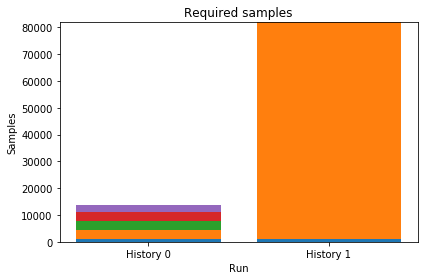

In [9]:
histories = [h_rejection_bad_c, h_bad_c, h]
labels = ["Rejection ABC", "Sequential ABC", "Adaptive c"]
pyabc.visualization.plot_sample_numbers(histories, labels)